In [61]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

#### Import data (Make sure to parse dates. Consider setting index column to 'date'.)

In [62]:
df = pd.read_csv("./fcc-forum-pageviews.csv", parse_dates=["date"], index_col="date")
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


#### Clean data

In [63]:
df = df[(df.value <= df.value.quantile(.975)) & (df.value >= df.value.quantile(.025))]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


#### Draw line plot

Text(0, 0.5, 'Page Views')

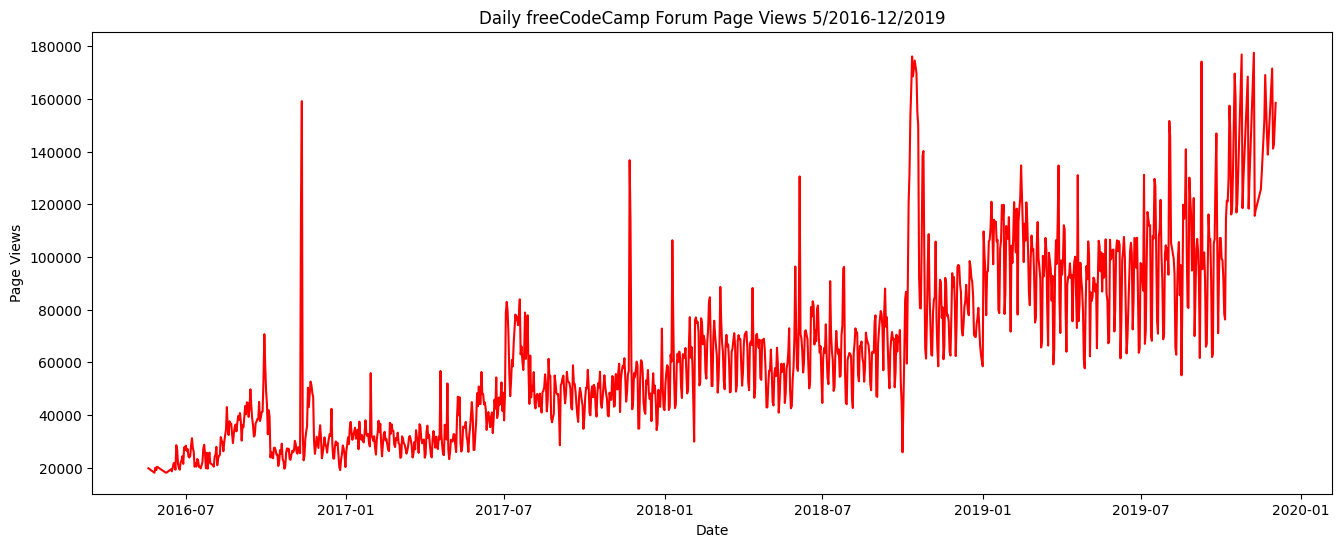

In [64]:
fig, ax = plt.subplots(figsize=(16,6))
plt.plot(df.index, df.value, "r")
plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
plt.xlabel("Date")
plt.ylabel("Page Views")

#### Save image and return fig (don't change this part)

In [65]:
fig.savefig("line_plot.png")

#### Copy and modify data for monthly bar plot

In [66]:
df_bar = df.copy()
df_bar.loc[:, 'year'] = df_bar.index.year
df_bar.loc[:, 'month'] = df_bar.index.month
df_bar.loc[:, 'month'] = df_bar.index.strftime('%B')
df_bar

,value,year,month
date,,,
2016-05-19,19736,2016,May
2016-05-26,18060,2016,May
2016-05-27,19997,2016,May
2016-05-28,19044,2016,May
2016-05-29,20325,2016,May
...,...,...,...
2019-11-24,138875,2019,November
2019-11-29,171584,2019,November
2019-11-30,141161,2019,November


#### Draw bar plot

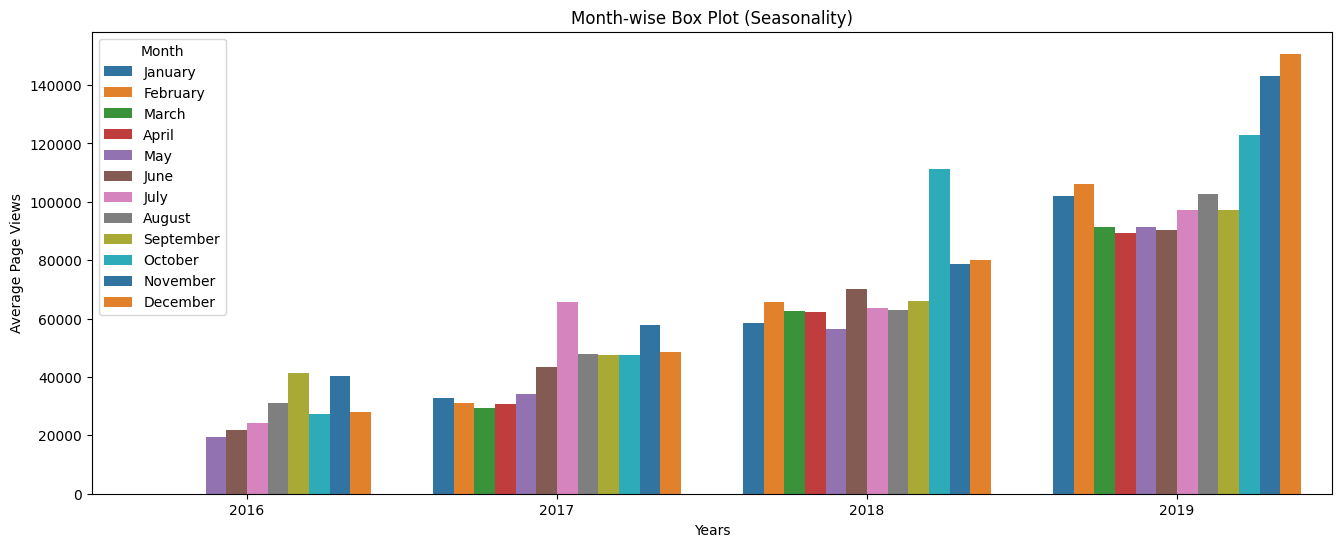

In [67]:
plt.figure(figsize=(16,6))
hue_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

bar = sns.barplot(
    df_bar, x="year", y="value", hue="month", hue_order=hue_order, palette=sns.color_palette(n_colors=12), errorbar=None)

bar.set(
    title="Month-wise Box Plot (Seasonality)", ylabel="Average Page Views", xlabel="Years")
plt.legend(title="Month")

#### Save image and return fig (don't change this part)

In [68]:
fig = bar.get_figure()
fig.savefig("bar_plot.png")

#### Prepare data for box plots (this part is done!)

In [69]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,Nov
1234,2019-11-29,171584,2019,Nov
1235,2019-11-30,141161,2019,Nov
1236,2019-12-01,142918,2019,Dec


#### Draw box plots (using Seaborn)

C:\Users\xandr\AppData\Local\Temp\ipykernel_13768\4017053880.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


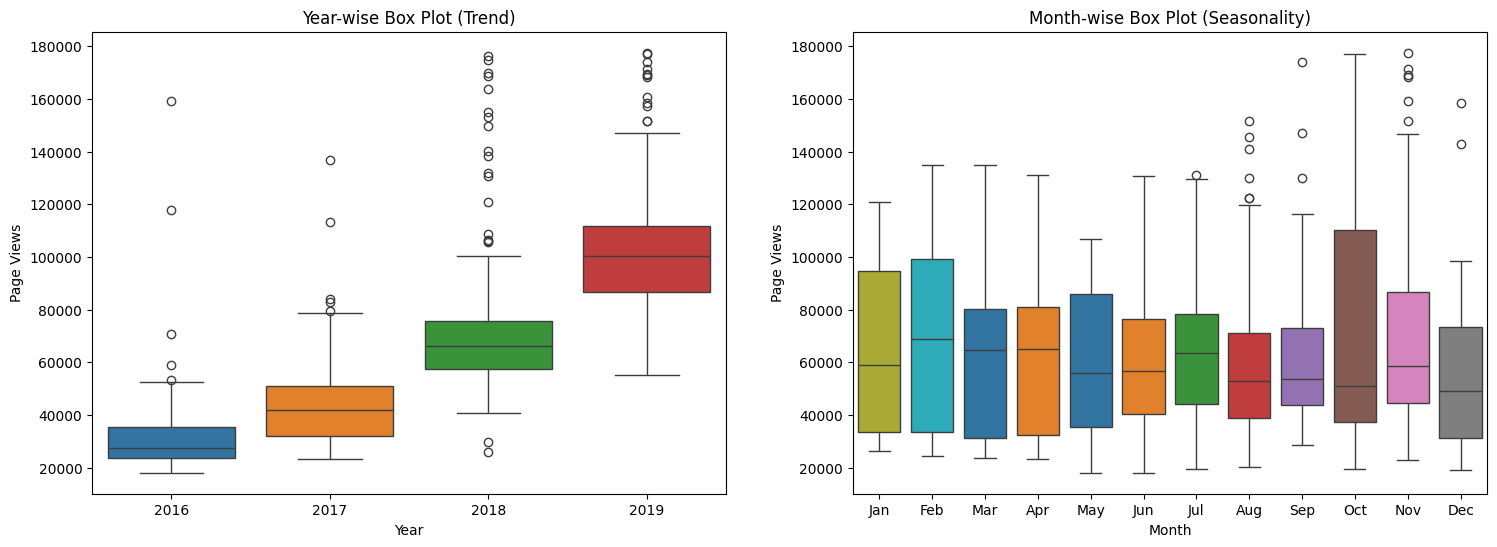

In [70]:
order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig, ax = plt.subplots(1,2, figsize=(18,6))

sns.boxplot(x=df_box.year, y=df_box.value, ax=ax[0], hue=df_box.year, legend=False, palette=sns.color_palette(n_colors=4)).set(
    ylabel="Page Views", xlabel="Year", title="Year-wise Box Plot (Trend)")
sns.boxplot(x=df_box.month, y=df_box.value, ax=ax[1], hue=df_box.month, order=order, legend=False, palette=sns.color_palette(n_colors=12)).set(
    ylabel="Page Views", xlabel="Month", title="Month-wise Box Plot (Seasonality)")
fig.show()

#### Save image and return fig (don't change this part)

In [71]:
fig.savefig('box_plot.png')